In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/flowers-recognition/train'
test_dir = '/content/drive/MyDrive/flowers-recognition/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=8,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

val_loss, val_acc = model.evaluate(test_generator)
print(f'Validation Accuracy: {val_acc:.4f}')

model.save('flowers_vgg16_model.h5')

print("Model training complete.")


Found 200 images belonging to 6 classes.
Found 52 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.1993 - loss: 5.2400 - val_accuracy: 0.2188 - val_loss: 2.3404
Epoch 2/8
1/6 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.2500 - loss: 4.4212

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2500 - loss: 4.4212 - val_accuracy: 0.5000 - val_loss: 1.5852
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.3706 - loss: 2.9542  
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4375 - loss: 2.3709 - val_accuracy: 0.6875 - val_loss: 0.8772
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.5460 - loss: 1.4610 - val_accuracy: 0.6500 - val_loss: 1.1003
Epoch 6/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 919ms/step - accuracy: 0.6562 - loss: 1.0629
Epoch 7/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 0.6631 - loss: 0.9398 - val_accuracy: 0.5625 - val_loss: 1.0701
Epoch 8/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7188 - loss: 0.8826 - val_accuracy: 0.6500 - val_loss: 0.9609
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6186 - loss: 0.9664


Validation Accuracy: 0.6154
Model training complete.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


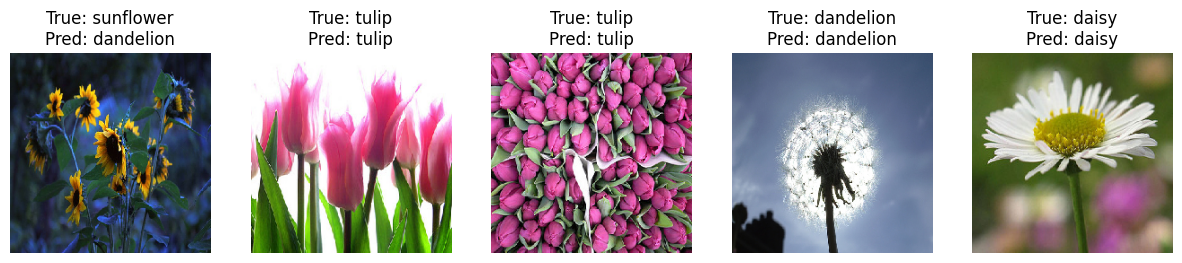

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def plot_predictions(model, test_generator, num_images=5):

    test_images, true_labels = next(test_generator)

    predictions = model.predict(test_images)

    class_labels = list(test_generator.class_indices.keys())

    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)

        img = test_images[i]
        img = np.clip(img, 0, 1)

        true_label = class_labels[np.argmax(true_labels[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]

        plt.imshow(img)
        plt.axis('off')

        plt.title(f'True: {true_label}\nPred: {predicted_label}')

    plt.show()

plot_predictions(model, test_generator, num_images=5)
